# Malware Names

Dealing with malware names...

Starting by filtering only the selected vendors, then understanding the unique number of names per vendor.

In [1]:
from IPython.display import display
from leven import levenshtein
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import re

data_folder = 'data/'
vendors_file = data_folder + 'vendors.csv.gz'
reports_file = data_folder + 'reports.csv.gz'
vendors_selected_file = data_folder + 'vendors_selected.csv.gz'
vendors_selected_filtered_file = data_folder + 'vendors_selected_filtered.csv.gz'
selected_vendors = ["Rising", "NANO-Antivirus", "Microsoft", "VBA32",
                    "TrendMicro", "Comodo", "AhnLab-V3", "Panda",
                    "Malwarebytes", "K7GW", "K7AntiVirus", "Symantec",
                    "MicroWorld-eScan", "F-Secure", "Ikarus", "DrWeb",
                    "Emsisoft", "Fortinet", "TrendMicro-HouseCall", "Avast",
                    "BitDefender", "AVG", "Kaspersky", "GData", "VIPRE",
                    "Sophos", "McAfee", "McAfee-GW-Edition", "ESET-NOD32"]

In [2]:
# Filter down vendors
# vendors = pd.read_csv(vendors_file, dtype=str)
# vendors = vendors.set_index('link')
# vendors = vendors[selected_vendors]
# vendors.to_csv(vendors_selected_file, compression='gzip')
vendors = pd.read_csv(vendors_selected_file, dtype=str)
vendors = vendors.set_index('link')
vendors.replace('Clean', np.nan, inplace=True)

In [3]:
unique_names = dict()
names_count = dict()
for vendor in vendors:
    unique_names[vendor] = vendors[vendor].dropna().unique()
    names_count[vendor] = len(vendors[vendor].dropna().unique())
    
names_count = pd.Series(names_count)

Graph showing the unique number of names per vendor:

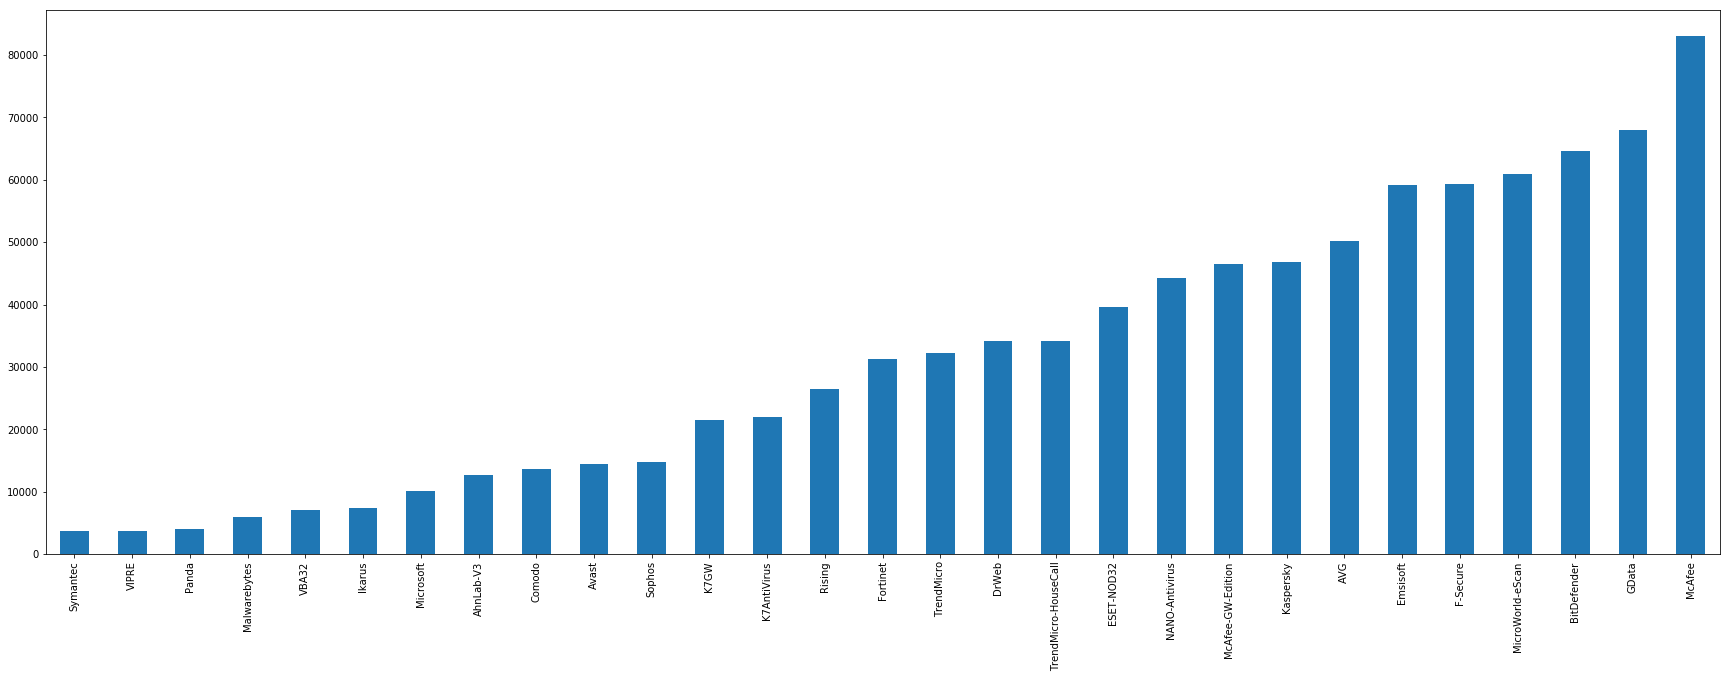

In [4]:
names_count.sort_values().plot.bar(figsize=((30, 10)))
plt.show()

## Understanding names

We want to split the malware into various levels and classes.

The highest level should be the propagation type: Virus, Worm, Trojan.

Bellow propagation type comes malware purpose and/or family.

### First Filterting

An inicial idea is to remove keywords below a given threshold, < 2 chars long. Keywords with 2 chars may still be relevant, like 'PE', 'BD', etc.

From len 2 strings, remove those with numbers. From all other, remove those that are hex values.

In [5]:
regex = re.compile(r'\W')
# Remove pairs that contain at least a number
regex2= re.compile(r'^\S\d|\d\S$')
# Remove hex values
regex3= re.compile(r'^[A-Fa-f0-9]{3,}$')

unique_keywords = dict()
filtered_names = dict()

for vendor in unique_names.keys():
    unique_keywords[vendor] = list()
    filtered_names[vendor] = set()
    for name in unique_names[vendor]:
        name = regex.split(name)
        unique_keywords[vendor] += name
        name = list(filter(lambda x: len(x) > 1 and not regex2.search(x) and not regex3.search(x), name))
        filtered_names[vendor].update(['.'.join(name)])

In [6]:
before = 0
after = 0
display('Filtered names:')
for vendor in filtered_names.keys():
    before += len(unique_names[vendor])
    after += len(filtered_names[vendor])
    # display('{} {}/{}'.format(vendor, len(filtered_names[vendor]), len(unique_names[vendor])))
display('Total: {}/{}'.format(after, before))

'Filtered names:'

'Total: 415519/921603'

Graph showing the number of filtered names per vendor, followed by graph with comparison of both

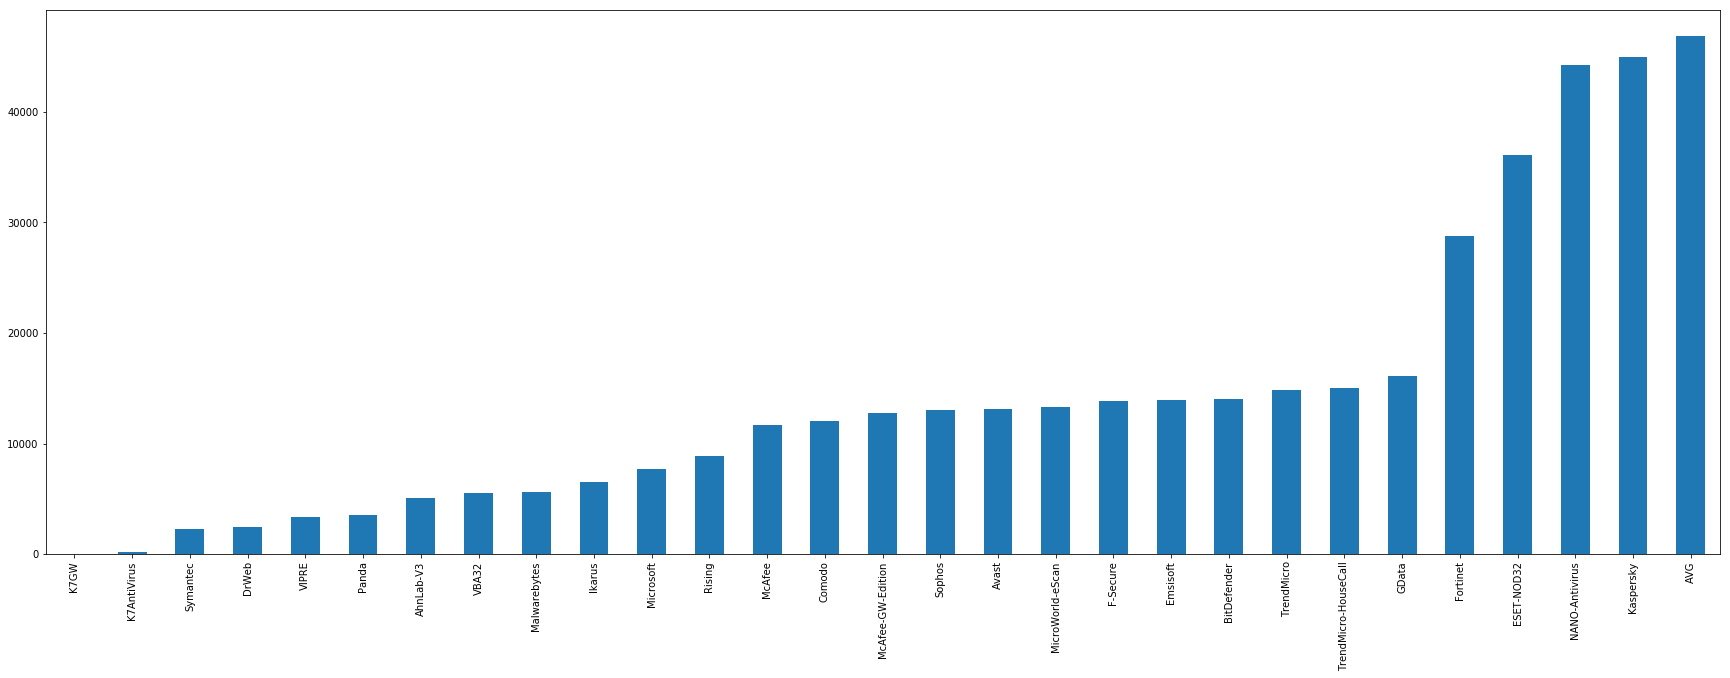

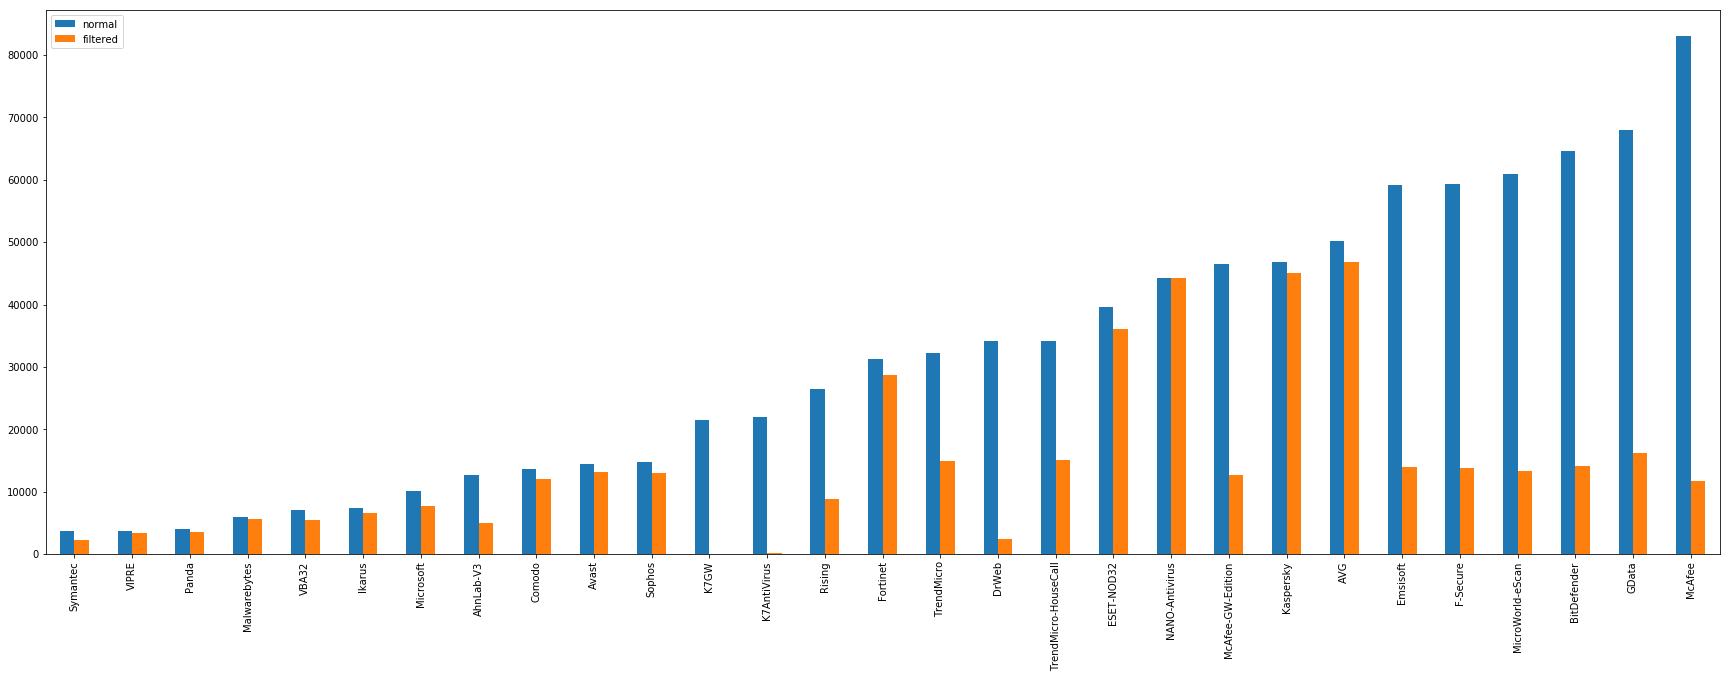

In [7]:
filtered_count = dict()
for vendor in filtered_names.keys():
    filtered_count[vendor] = len(filtered_names[vendor])
filtered_count = pd.Series(filtered_count)
filtered_count.sort_values().plot.bar(figsize=((30, 10)))
    
names_count_df = pd.DataFrame(names_count)
names_count_df[1] = filtered_count
names_count_df.columns = ['normal', 'filtered']
names_count_df.sort_values(by='normal').plot.bar(figsize=((30, 10)))
plt.show()

Apply the filter to the vendors DataFrame

In [8]:
def filter_func(name):
    if name is np.nan:
        return np.nan
    name = regex.split(name)
    name = list(filter(lambda x: len(x) > 1 and not regex2.search(x) and not regex3.search(x), name))
    return '.'.join(name)

vendors_filtered = vendors.applymap(filter_func)
vendors_filtered.to_csv(vendors_selected_filtered_file, compression='gzip')
# vendors_filtered = pd.read_csv(vendors_selected_filtered_file, dtype='str')
# vendors_filtered = vendors_filtered.set_index('link')

Build the name graph

In [9]:
subset = vendors_filtered[:10]
display(subset)

,Rising,NANO-Antivirus,Microsoft,VBA32,TrendMicro,Comodo,AhnLab-V3,Panda,Malwarebytes,K7GW,...,Avast,BitDefender,AVG,Kaspersky,GData,VIPRE,Sophos,McAfee,McAfee-GW-Edition,ESET-NOD32
link,,,,,,,,,,,,,,,,,,,,,
MDRlOGFlOTRjMzNjNGJhNmEwMWQ0MWFiMDYzYmJhNmI,PE.Backdoor.Undef,Trojan.Inject.sang,Trojan.Pugeju,BScope.Trojan.Kidalo,TROJ_GEN,TrojWare.Trojan.Agent.Gen,NaN,Trj.Downloader.TCN,NaN,Riskware,...,Obfuscated.EHL.Trj,Gen.ExplorerHijack.bmHfaGxumE,Small.BO,HEUR.Trojan.Invader,Gen.ExplorerHijack.bmHfaGxumE,Trojan.Generic.BT,Mal.Behav,generic.bg.exq,generic.bg.exq,variant.of.Obfuscated.NAX
YzE2YTA3ZmNkOTIyNDkyMTk1YmY5ZTEyNTkzZTc5ODI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Suspicious.file,Rootkit.0Access,NaN,...,NaN,Gen.Variant.Symmi,NaN,Packed.Katusha,Gen.Variant.Symmi,NaN,NaN,NaN,NaN,variant.of.Kryptik.BKBB
MjEwYmY3OGExMGMyNGM0Y2JhN2NlNjg2ZjY1MzAxMTI,NaN,Trojan.FrauDrop.cwxrdl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,MSIL.GenMalicious.GG.Trj,NaN,NaN,NaN,NaN,NaN,Troj.MSIL.BHT,NaN,BehavesLike.Suspect.vc,variant.of.MSIL.Injector.CUZ
YzViZWZlMWJhNjU5NDIyMWFjNWU1NDY2OWRmYTM1ZWM,PE.Trojan.Generic,Trojan.XDR.czpdjp,VirTool.Vbinder,SScope.Trojan.Zbot.gen,NaN,NaN,NaN,Trj.Chgt,NaN,Trojan,...,Malware.gen,Gen.Trojan.Heur.zuZ.XwR.JWii,BackDoor.WJC,HEUR.Trojan.Generic,Gen.Trojan.Heur.zuZ.XwR.JWii,Detect.Trojan.Small.nmm,Mal.Generic,Artemis,NaN,TrojanDropper.Small.NMM
MGM2OTY4ZGRhM2U0NGFjYWFmOGJkODk2ODU1NzI1Y2I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YjA2YzRiODk5YmZkNDY4NTliMjI4ZDFmMGUxYWVjYWY,NaN,Trojan.Injector.dobjgo,NaN,NaN,TROJ_GEN,NaN,NaN,Trj.Genetic.gen,NaN,Unwanted.Program,...,Malware.gen,Trojan.Generic,Crypt3.BWEF,Trojan.Dropper.Injector.lezv,Trojan.Generic,Trojan.Generic.BT,Mal.Generic,RDN.Generic.hra.ce,RDN.Generic.hra.ce,variant.of.Kryptik.CWCW
M2Y4MTg2YjZmODVhNGUyZGJhZTQ4YmZkZjRjZGJmNzI,NaN,NaN,NaN,suspected.of.Trojan.Downloader.gen,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Gen.Variant.Symmi,NaN,HEUR.Trojan.Generic,Gen.Variant.Symmi,NaN,NaN,NaN,NaN,variant.of.TrojanDownloader.Banload.URO
Y2Y4MTJjODk2N2Y3NGI2ODgzYTZkNWZjMDViYzQzODQ,NaN,Trojan.Click2.dfnbfk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Malware.gen,NaN,OMC,NaN,NaN,NaN,NaN,Artemis,BehavesLike.Rontokbro.tc,NaN
YmU1YzRhYzZhZDkwNDdmZjhiY2NjOTAyNWMxOWZjMGQ,PE.Trojan.Spammer.aew,Trojan.Agent.tjzy,PWS.Fignotok,Trojan.Dropper.Resgen,BKDR_BIFROSE.SMN,TrojWare.PSW.Agent.SZX,Trojan.Agent,Trj.Downloader.MDW,Trojan.PWS,Trojan,...,Spyware.gen.Spy,Trojan.Agent.AOLF,Agent4.AJSR,Trojan.Agent.cccr,Trojan.Agent.AOLF,Trojan.Agent.cccr,Troj.Spy.ED,Generic.Dropper.ny,Heuristic.LooksLike.Suspicious,PSW.Agent.NLY


In [10]:
# TODO replace the names with an index, use it in the sparse matrix
# in the end, do the counting and replace the indexes with the actual names.

# matrix = scipy.sparse.identity(after)

names = set()

for vendor in subset:
    names.update(subset[vendor].dropna().unique())

display(names)

matrix = dict()

for idx, sample in subset.iterrows():
    break
    values = sample.dropna().values
    for name in values:
        pass

{'Agent.NLY.tr',
 'Agent4.AJSR',
 'Artemis',
 'BKDR_BIFROSE.SMN',
 'BScope.Trojan.Kidalo',
 'BackDoor.WJC',
 'Backdoor.DarkKomet',
 'BehavesLike.Rontokbro.tc',
 'BehavesLike.Suspect.vc',
 'Crypt3.BWEF',
 'Detect.Trojan.Small.nmm',
 'Gen.ExplorerHijack.bmHfaGxumE',
 'Gen.Trojan.Heur.zuZ.XwR.JWii',
 'Gen.Variant.Symmi',
 'Generic.Dropper.ny',
 'HEUR.Trojan.Generic',
 'HEUR.Trojan.Invader',
 'Heuristic.LooksLike.Suspicious',
 'Infostealer',
 'Kryptik.ANHW.tr',
 'Kryptik.CVUO.tr',
 'Kryptik.DY.tr',
 'MSIL.GenMalicious.GG.Trj',
 'Mal.Behav',
 'Mal.Generic',
 'Malware.gen',
 'OMC',
 'Obfuscated.EHL.Trj',
 'PE.Backdoor.Undef',
 'PE.Trojan.Generic',
 'PE.Trojan.Spammer.aew',
 'PSW.Agent.NLY',
 'PWS.Fignotok',
 'Packed.Katusha',
 'Packer.Krap',
 'RDN.Generic.hra.ce',
 'Riskware',
 'Rootkit.0Access',
 'SScope.Trojan.Zbot.gen',
 'Small.BO',
 'Spyware.gen.Spy',
 'Suspicious',
 'Suspicious.file',
 'TROJ_GEN',
 'Trj.Chgt',
 'Trj.Downloader.MDW',
 'Trj.Downloader.TCN',
 'Trj.Genetic.gen',
 'Troj.MSIL

In [11]:
%%time
graph = dict()

for idx, sample in subset.iterrows():
    values = sample.dropna().values
    for name in values:
        values2 = values[values != name]
        if name in graph:
            graph[name].update(list(values2))
        else:
            graph[name] = set(values2)

CPU times: user 6.61 ms, sys: 0 ns, total: 6.61 ms
Wall time: 6.09 ms


In [12]:
from scipy.sparse import identity

display(identity(10).toarray())

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])